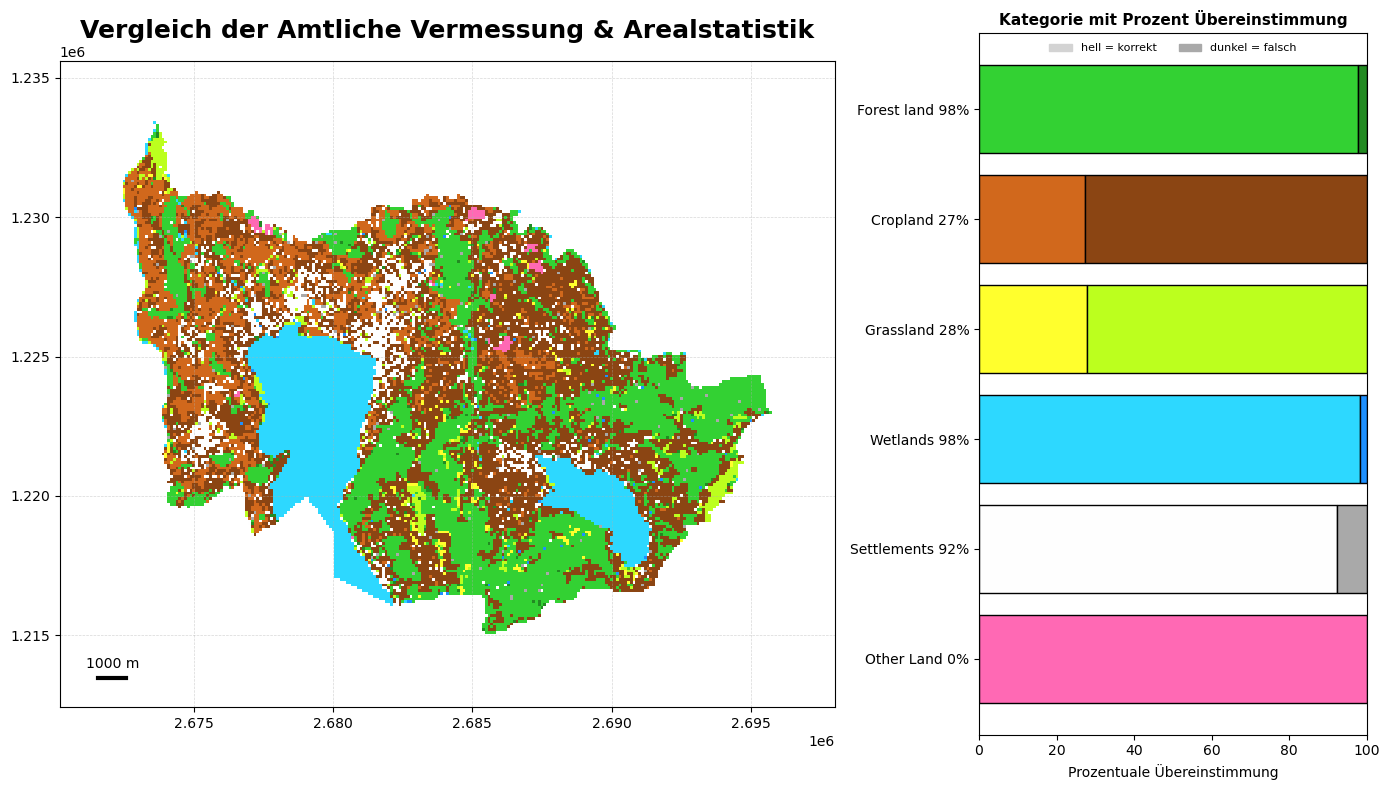

In [4]:
import os
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
os.environ['5230_As'] = r"c:\Users\aebim\anaconda3\envs\5230_As"
from matplotlib.colors import to_rgb
import matplotlib.patches as mpatches

# -----------------------------
# 1. GeoPackage laden
# -----------------------------
gpkg_path = r"C:\Users\st1179523\Documents\GitHub\landcover_analysis\data\analysis\av\AV_As_Center_Pixel.gpkg"
gdf = gpd.read_file(gpkg_path)

# CRS prüfen und ggf. auf EPSG:2056 setzen
if gdf.crs.to_epsg() != 2056:
    gdf = gdf.to_crs(epsg=2056)

# -----------------------------
# 2. Kategorie-Farben definieren
# -----------------------------
category_colors = {
    1: "#228B22",   # Forest land -> grün
    2: "#8B4513",   # Cropland -> braun
    3: "#BCFF1E", 
    4: "#1E90FF",   # Wetlands -> blau
    5: "#A9A9A9",   # Settlements -> grau
    6: "#FF69B4"    # Other Land -> pink
}

def adjust_brightness(color, factor):
    rgb = np.array(to_rgb(color))
    rgb = np.clip(rgb * factor, 0, 1)
    return rgb

color_low_sat = {k: adjust_brightness(v, 1.5) for k, v in category_colors.items()}  # hell = korrekt
color_high_sat = {k: adjust_brightness(v, 1.0) for k, v in category_colors.items()} # kräftig = falsch

# -----------------------------
# 3. Farbe pro Polygon zuweisen
# -----------------------------
def get_color(row):
    a_cat = row["IPCC_AV_Id"]
    b_cat = row["IPCC_AS_Id"]
    if a_cat == b_cat:
        return color_low_sat.get(a_cat, "#ffffff")
    else:
        return color_high_sat.get(a_cat, "#ffffff")

gdf["plot_color"] = gdf.apply(get_color, axis=1)

# -----------------------------
# 4. Übereinstimmungsraten pro Kategorie
# -----------------------------
accuracy_per_class = []
for cat in category_colors.keys():
    mask_class = gdf["IPCC_AV_Id"] == cat
    correct = np.sum(gdf.loc[mask_class, "IPCC_AS_Id"] == cat)
    total = np.sum(mask_class)
    pct = (correct / total * 100) if total > 0 else 0
    accuracy_per_class.append((cat, pct))

# -----------------------------
# 5. Karte + Balken-Legende plotten
# -----------------------------
fig, (ax_map, ax_bar) = plt.subplots(1, 2, figsize=(14, 8), width_ratios=[2, 1])

# Karte
gdf.plot(ax=ax_map, color=gdf["plot_color"], edgecolor="none", linewidth=0.2)
ax_map.set_title("Vergleich der Amtliche Vermessung & Arealstatistik", fontsize=18, fontweight="bold")
ax_map.axis("on")

# -----------------------------
# 5a. Koordinatenband
# -----------------------------

ax_map.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

# -----------------------------
# 5b. Maßstab
# -----------------------------
# Einfacher Maßstab: Linie + Text
xlim = ax_map.get_xlim()
ylim = ax_map.get_ylim()
scalebar_length = 1000  # 1000 Meter
scalebar_x = xlim[0] + (xlim[1]-xlim[0])*0.05
scalebar_y = ylim[0] + (ylim[1]-ylim[0])*0.02
ax_map.plot([scalebar_x, scalebar_x + scalebar_length], [scalebar_y, scalebar_y], color='black', linewidth=3)
ax_map.text(scalebar_x + scalebar_length/2, scalebar_y + (ylim[1]-ylim[0])*0.01, f"{scalebar_length} m",
            ha='center', va='bottom', fontsize=10)

# -----------------------------
# Balken-Legende
# -----------------------------
for idx, (cat, pct) in enumerate(accuracy_per_class):
    incorrect_pct = 100 - pct
    ax_bar.barh(idx, pct, color=color_low_sat[cat], edgecolor='black')
    ax_bar.barh(idx, incorrect_pct, left=pct, color=color_high_sat[cat], edgecolor='black')

# Y-Achse: Kategorie + Prozentwert IPCC Kategorien
category_names = {
    1: "Forest land",
    2: "Cropland",
    3: "Grassland",
    4: "Wetlands",
    5: "Settlements",
    6: "Other Land"
}
ax_bar.set_yticks(range(len(category_colors)))
ax_bar.set_yticklabels([f"{category_names[cat]} {pct:.0f}%" for (cat, pct) in accuracy_per_class])

# X-Achse
ax_bar.set_xlim(0, 100)
ax_bar.set_xlabel("Prozentuale Übereinstimmung")

# Titel oberhalb der Balken
ax_bar.set_title("Kategorie mit Prozent Übereinstimmung", fontsize=11, fontweight="bold")

# Erklärung hell/dunkel horizontal
legend_patches = [
    mpatches.Patch(color="lightgrey", label="hell = korrekt"),
    mpatches.Patch(color="darkgrey", label="dunkel = falsch")
]
ax_bar.legend(handles=legend_patches, loc="upper center", fontsize=8, ncol=2, frameon=False)

plt.gca().invert_yaxis()  # Balken von oben nach unten
plt.tight_layout()
plt.show()


c:\Users\st1179523\.conda\envs\5230_As\lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: This version of GeoPackage user_version=0x000028A0 (10400, v1.4.0) on 'C:\Users\st1179523\Documents\GitHub\landcover_analysis\data\analysis\av\AV_As_Maximal_Area.gpkg' may only be partially supported
  return ogr_read(


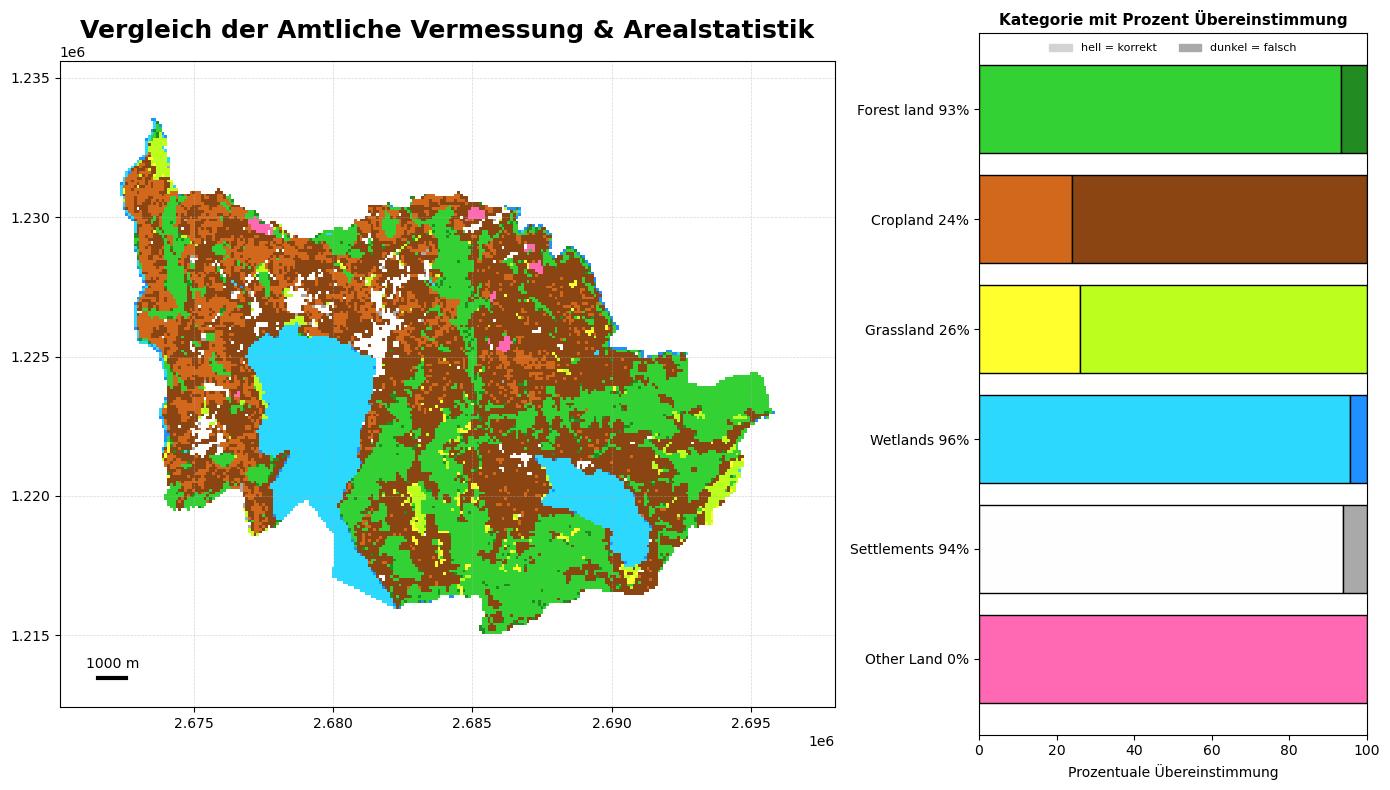

In [5]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb
import matplotlib.patches as mpatches

# -----------------------------
# 1. GeoPackage laden
# -----------------------------
gpkg_path = r"C:\Users\st1179523\Documents\GitHub\landcover_analysis\data\analysis\av\AV_As_Maximal_Area.gpkg"
gdf = gpd.read_file(gpkg_path)

# CRS prüfen und ggf. auf EPSG:2056 setzen
if gdf.crs.to_epsg() != 2056:
    gdf = gdf.to_crs(epsg=2056)

# -----------------------------
# 2. Kategorie-Farben definieren
# -----------------------------
category_colors = {
    1: "#228B22",   # Forest land -> grün
    2: "#8B4513",   # Cropland -> braun
    3: "#BCFF1E", 
    4: "#1E90FF",   # Wetlands -> blau
    5: "#A9A9A9",   # Settlements -> grau
    6: "#FF69B4"    # Other Land -> pink
}

def adjust_brightness(color, factor):
    rgb = np.array(to_rgb(color))
    rgb = np.clip(rgb * factor, 0, 1)
    return rgb

color_low_sat = {k: adjust_brightness(v, 1.5) for k, v in category_colors.items()}  # hell = korrekt
color_high_sat = {k: adjust_brightness(v, 1.0) for k, v in category_colors.items()} # kräftig = falsch

# -----------------------------
# 3. Farbe pro Polygon zuweisen
# -----------------------------
def get_color(row):
    a_cat = row["IPCC_AV_Id"]
    b_cat = row["IPCC_AS_Id"]
    if a_cat == b_cat:
        return color_low_sat.get(a_cat, "#ffffff")
    else:
        return color_high_sat.get(a_cat, "#ffffff")

gdf["plot_color"] = gdf.apply(get_color, axis=1)

# -----------------------------
# 4. Übereinstimmungsraten pro Kategorie
# -----------------------------
accuracy_per_class = []
for cat in category_colors.keys():
    mask_class = gdf["IPCC_AV_Id"] == cat
    correct = np.sum(gdf.loc[mask_class, "IPCC_AS_Id"] == cat)
    total = np.sum(mask_class)
    pct = (correct / total * 100) if total > 0 else 0
    accuracy_per_class.append((cat, pct))

# -----------------------------
# 5. Karte + Balken-Legende plotten
# -----------------------------
fig, (ax_map, ax_bar) = plt.subplots(1, 2, figsize=(14, 8), width_ratios=[2, 1])

# Karte
gdf.plot(ax=ax_map, color=gdf["plot_color"], edgecolor="none", linewidth=0.2)
ax_map.set_title("Vergleich der Amtliche Vermessung & Arealstatistik", fontsize=18, fontweight="bold")
ax_map.axis("on")

# -----------------------------
# 5a. Koordinatenband
# -----------------------------

ax_map.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

# -----------------------------
# 5b. Maßstab
# -----------------------------
# Einfacher Maßstab: Linie + Text
xlim = ax_map.get_xlim()
ylim = ax_map.get_ylim()
scalebar_length = 1000  # 1000 Meter
scalebar_x = xlim[0] + (xlim[1]-xlim[0])*0.05
scalebar_y = ylim[0] + (ylim[1]-ylim[0])*0.02
ax_map.plot([scalebar_x, scalebar_x + scalebar_length], [scalebar_y, scalebar_y], color='black', linewidth=3)
ax_map.text(scalebar_x + scalebar_length/2, scalebar_y + (ylim[1]-ylim[0])*0.01, f"{scalebar_length} m",
            ha='center', va='bottom', fontsize=10)

# -----------------------------
# Balken-Legende
# -----------------------------
for idx, (cat, pct) in enumerate(accuracy_per_class):
    incorrect_pct = 100 - pct
    ax_bar.barh(idx, pct, color=color_low_sat[cat], edgecolor='black')
    ax_bar.barh(idx, incorrect_pct, left=pct, color=color_high_sat[cat], edgecolor='black')

# Y-Achse: Kategorie + Prozentwert IPCC Kategorien
category_names = {
    1: "Forest land",
    2: "Cropland",
    3: "Grassland",
    4: "Wetlands",
    5: "Settlements",
    6: "Other Land"
}
ax_bar.set_yticks(range(len(category_colors)))
ax_bar.set_yticklabels([f"{category_names[cat]} {pct:.0f}%" for (cat, pct) in accuracy_per_class])

# X-Achse
ax_bar.set_xlim(0, 100)
ax_bar.set_xlabel("Prozentuale Übereinstimmung")

# Titel oberhalb der Balken
ax_bar.set_title("Kategorie mit Prozent Übereinstimmung", fontsize=11, fontweight="bold")

# Erklärung hell/dunkel horizontal
legend_patches = [
    mpatches.Patch(color="lightgrey", label="hell = korrekt"),
    mpatches.Patch(color="darkgrey", label="dunkel = falsch")
]
ax_bar.legend(handles=legend_patches, loc="upper center", fontsize=8, ncol=2, frameon=False)

plt.gca().invert_yaxis()  # Balken von oben nach unten
plt.tight_layout()
plt.show()


In [17]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb
import matplotlib.patches as mpatches

def plot_av_vs_as(gdf: gpd.GeoDataFrame, As_Kategorie: str, Kategorie: str, Titel: str):
    """
    Vergleicht zwei Kategorisierungsspalten in einem GeoDataFrame
    und erstellt eine Karte + Balkendiagramm mit Übereinstimmungsraten.
    """

    # Sicherstellen, dass CRS metrisch ist (EPSG:2056)
    if gdf.crs is None or gdf.crs.to_epsg() != 2056:
        gdf = gdf.to_crs(epsg=2056)

    # Farben definieren
    category_colors = {
        1: "#228B22",   # Forest land
        2: "#8B4513",   # Cropland
        3: "#BCFF1E",   # Grassland
        4: "#1E90FF",   # Wetlands
        5: "#A9A9A9",   # Settlements
        6: "#F31383"    # Other Land
    }

    def adjust_brightness(color, factor):
        rgb = np.array(to_rgb(color))
        rgb = np.clip(rgb * factor, 0, 1)
        return rgb

    # Hell = korrekt, kräftig = falsch
    color_low_sat = {k: adjust_brightness(v, 1.5) for k, v in category_colors.items()}
    color_high_sat = {k: adjust_brightness(v, 1.0) for k, v in category_colors.items()}

    # Farbe pro Polygon zuweisen
    def get_color(row):
        a_cat = row[As_Kategorie]
        b_cat = row[Kategorie]
        return color_low_sat[a_cat] if a_cat == b_cat else color_high_sat[a_cat]

    gdf["plot_color"] = gdf.apply(get_color, axis=1)

    # Übereinstimmungsraten pro Kategorie
    accuracy_per_class = []
    for cat in category_colors.keys():
        mask = gdf[As_Kategorie] == cat
        correct = np.sum(gdf.loc[mask, Kategorie] == cat)
        total = np.sum(mask)
        pct = (correct / total * 100) if total > 0 else 0
        accuracy_per_class.append((cat, pct))

    # Sortierung der Kategorien nach Häufigkeit (absteigend)
    category_counts = gdf[As_Kategorie].value_counts()
    ordered_cats = list(category_counts.index)

    # Berechnung der Balkenhöhen: Häufigkeit → Höhe (0.2 bis 1.0)
    heights = {}
    max_count = category_counts.max()
    min_count = category_counts.min()

    min_h = 0.2
    max_h = 1.0

    for cat in ordered_cats:
        count = category_counts[cat]
        if max_count == min_count:
            h = 1.0
        else:
            h = min_h + (count - min_count) / (max_count - min_count) * (max_h - min_h)
        heights[cat] = h

    # Sortierte Accuracy-Liste
    accuracy_per_class_ordered = [
        (cat, next(pct for (c, pct) in accuracy_per_class if c == cat))
        for cat in ordered_cats
    ]

    # Plot: Karte + Balken
    fig, (ax_map, ax_bar) = plt.subplots(1, 2, figsize=(14, 8), width_ratios=[2, 1])

    # Karte
    gdf.plot(ax=ax_map, color=gdf["plot_color"], edgecolor="none", linewidth=0.2)
    ax_map.set_title(Titel, fontsize=18, fontweight="bold")
    ax_map.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

    # Maßstab
    xlim = ax_map.get_xlim()
    ylim = ax_map.get_ylim()
    scalebar_length = 1000
    scalebar_x = xlim[0] + (xlim[1] - xlim[0]) * 0.05
    scalebar_y = ylim[0] + (ylim[1] - ylim[0]) * 0.02
    ax_map.plot([scalebar_x, scalebar_x + scalebar_length],
                [scalebar_y, scalebar_y], color='black', linewidth=3)
    ax_map.text(scalebar_x + scalebar_length/2,
                scalebar_y + (ylim[1]-ylim[0])*0.01,
                f"{scalebar_length} m", ha='center', fontsize=10)

    # Kategorie-Namen
    category_names = {
        1: "Forest land",
        2: "Cropland",
        3: "Grassland",
        4: "Wetlands",
        5: "Settlements",
        6: "Other Land"
    }

    # Balkenplot **mit variabler Höhe**
    for idx, (cat, pct) in enumerate(accuracy_per_class_ordered):
        incorrect = 100 - pct
        h = heights[cat]  # hier wird die Häufigkeit umgesetzt

        ax_bar.barh(idx, pct, height=h, color=color_low_sat[cat], edgecolor="black")
        ax_bar.barh(idx, incorrect, left=pct, height=h, color=color_high_sat[cat], edgecolor="black")

    ax_bar.set_yticks(range(len(ordered_cats)))
    ax_bar.set_yticklabels(
        [f"{category_names[cat]} {pct:.0f}%" for (cat, pct) in accuracy_per_class_ordered]
    )

    ax_bar.set_xlim(0, 100)
    ax_bar.set_xlabel("Prozentuale Übereinstimmung")
    ax_bar.set_title("Kategorie mit Prozent Übereinstimmung", fontsize=12, fontweight="bold")

    # Legende korrekt / falsch
    legend_patches = [
        mpatches.Patch(color="lightgrey", label="hell = korrekt"),
        mpatches.Patch(color="darkgrey", label="dunkel = falsch")
    ]
    ax_bar.legend(handles=legend_patches, loc="upper center", ncol=2, frameon=False, fontsize=8)

    ax_bar.invert_yaxis()
    plt.tight_layout()
    plt.show()


In [2]:
gpkg_path = r"C:\Users\aebim\Documents\02_Ausbildung\Studium\05_Semester\5230_Geoniformatik_Raumanalyse\Projektarbeit\03_GitHub\data\analysis\av\AV_As_Center_Pixel_ZH2.gpkg"
gdf = gpd.read_file(gpkg_path)

As_Kategorie="IPCC_AV_Id"
Kategorie="IPCC_AS_Id"

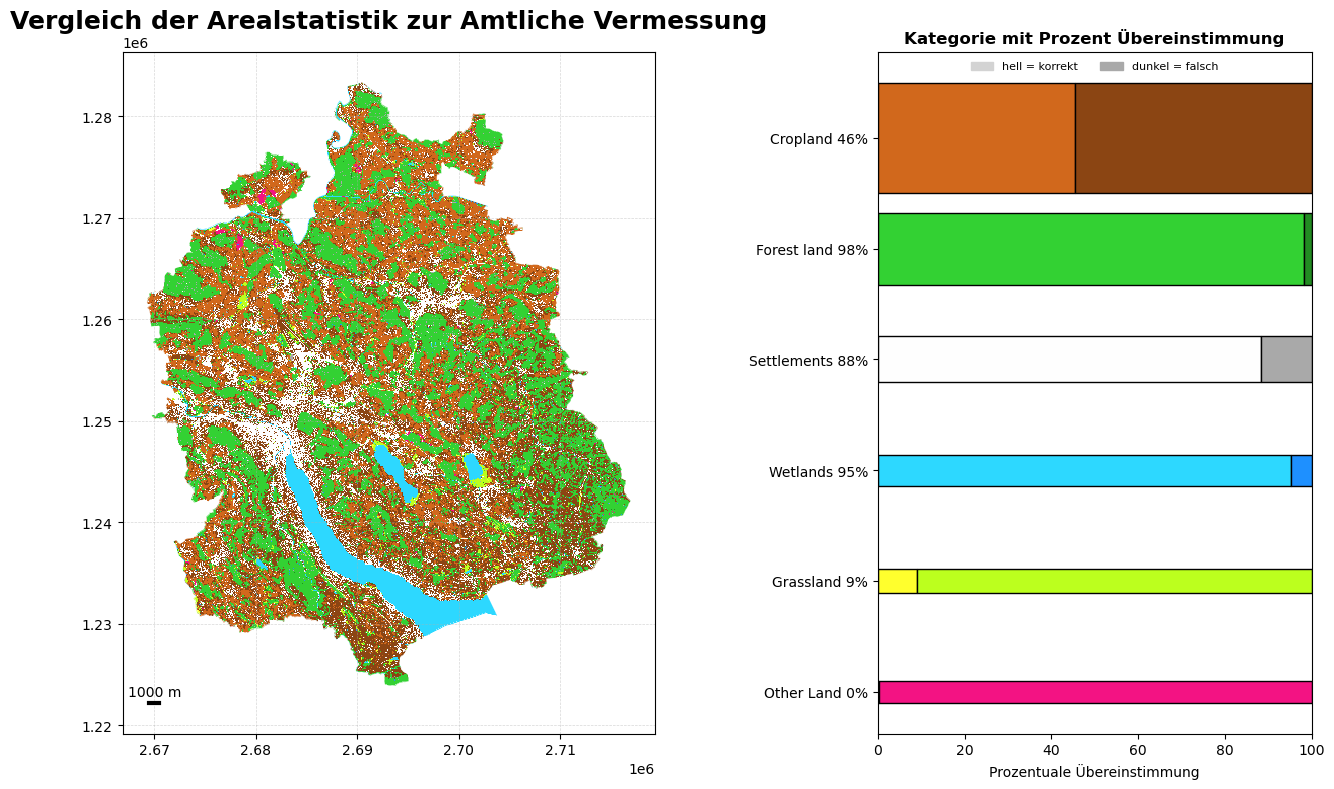

In [ ]:

plot_av_vs_as(gdf,As_Kategorie ,Kategorie, "Vergleich der Arealstatistik zur Amtliche Vermessung")
